In [ ]:
# import library
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# 1. Eksplorasi dan Statistik Deskriptif

In [ ]:
# load data dengan pemisah tab
df = pd.read_csv("/content/marketing_campaign.csv", sep='\t')

# tampilkan 5 baris pertama
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
pd.set_option('display.max_columns', None)  # tampilkan semua kolom
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Poin 1 - Pahami Struktur Dataset & Identifikasi Variabel Penting
1. Dataset terdiri dari informasi demografi (Education, Marital_Status, Income, Age), perilaku belanja (Recency, pengeluaran produk seperti MntWines, MntMeatProducts, dll, serta channel pembelian), dan variabel waktu (Dt_Customer).

2. Variabel penting untuk hipotesis ini :
*   Education -> Kategorikal, tingkat pendidikan customer.
*   MntWines → Numerik, total pengeluaran customer untuk produk wine dalam 2 tahun terakhir (indikator perilaku konsumsi produk premium).






In [ ]:
# Cek ukuran dataset
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (2240, 29)


In [ ]:
# Info kolom, tipe data, missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Statistik deskriptif numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
df.describe(include='object').T # deskripsi statistik untuk kolom kategorikal

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


# Poin 2 - Eksplorasi Pola dan Karakteristik Data
Tujuannya : Mengenali gambaran umum customer → siapa mereka, dan bagaimana perilaku konsumsi produk mereka.
Variabel yang dipilih lebih condong ke profil demografis dan perilaku belanja produk premium.

1. MntWines : Variabel ini menggambarkan total pengeluaran customer untuk produk wine dalam 2 tahun terakhir. Semakin besar nilainya, semakin besar porsi belanja customer pada produk premium. Variabel ini penting karena bisa menjadi indikator preferensi konsumsi.

2. Education : Tingkat pendidikan menggambarkan latar belakang demografis customer. Perbedaan tingkat pendidikan (misalnya Graduation, PhD, Master, 2n Cycle) bisa memengaruhi daya beli maupun preferensi produk.

3. Pola yang Mungkin Muncul : Ada kemungkinan tingkat pendidikan berpengaruh pada pengeluaran wine. Misalnya:
*   Customer dengan pendidikan lebih tinggi (PhD, Master) → cenderung memiliki daya beli lebih besar → pengeluaran wine lebih tinggi.
*   Customer dengan pendidikan lebih rendah → mungkin lebih hemat atau prioritas belanja berbeda → pengeluaran wine lebih kecil.

4. Visualisasi Awal : Untuk melihat gambaran perbedaan ini, digunakan boxplot MntWines berdasarkan Education. Boxplot membantu memperlihatkan sebaran pengeluaran wine di tiap kategori tingkat pendidikan.

















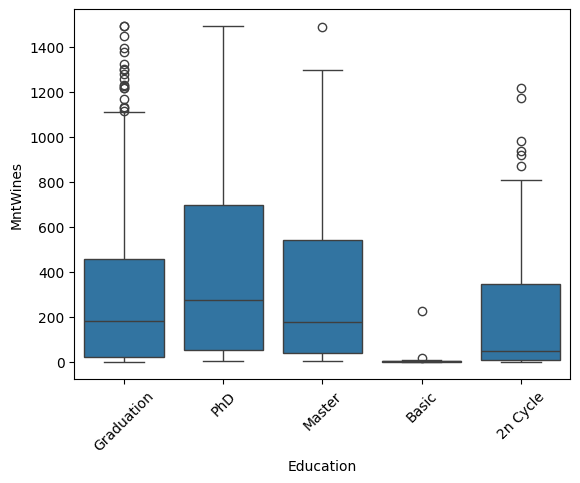

In [ ]:
# visualisasikan menggunakan boxplot
sns.boxplot(data=df, x='Education', y='MntWines')
plt.xticks(rotation=45)
plt.show()

**Interpretasi**
1. Visualisasi Awal : Untuk melihat perbedaan distribusi pengeluaran wine (MntWines) antar kategori tingkat pendidikan (Education), dibuat boxplot.
*   Boxplot menunjukkan adanya variasi pengeluaran wine pada semua tingkat pendidikan.
*   Kelompok dengan pendidikan PhD dan Graduation memiliki median pengeluaran wine yang relatif lebih tinggi dibanding kelompok lain.
*   Kelompok Basic terlihat memiliki median paling rendah, artinya customer dengan pendidikan dasar cenderung lebih sedikit mengeluarkan uang untuk wine.
*   Penyebaran (rentang antar kuartil) juga lebih lebar pada kelompok PhD dan Master, menandakan variasi perilaku konsumsi wine yang lebih beragam di kelompok ini.
*   Terlihat banyak outlier pada semua kategori, terutama di kelompok Graduation dan PhD, artinya ada sebagian kecil customer yang melakukan pembelian wine dalam jumlah jauh lebih besar dibanding mayoritas.

2. Statistik Per Kategori
*   Untuk melengkapi boxplot, dilakukan ringkasan statistik per kategori Education. Hasil ini akan memberikan gambaran lebih detail terkait rata-rata, median, standar deviasi, serta nilai minimum dan maksimum pengeluaran wine pada tiap kelompok pendidikan.



In [ ]:
# cek deskripsi statistik per Education
df.groupby('Education')['MntWines'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
2n Cycle,203.0,198.182266,261.475727,0.0,9.00,48.0,347.00,1215.0
Basic,54.0,7.240741,30.763207,0.0,1.00,2.0,4.75,228.0
Graduation,1127.0,284.268855,308.212588,0.0,23.00,183.0,458.50,1492.0
Master,370.0,333.075676,354.100379,2.0,37.25,179.0,542.00,1486.0
PhD,486.0,404.495885,390.327036,2.0,52.00,276.5,698.75,1493.0


*   Dari output terlihat bahwa rata-rata pengeluaran wine (MntWines) berbeda antar kategori Education.
*   Misalnya:
1. PhD : Mean ~404, median ~276 → kelompok dengan rata-rata pengeluaran wine paling tinggi.
2. Master : Mean ~333, median ~179 → cenderung cukup tinggi, dengan sebaran konsumsi luas.
3. Graduation : Mean ~284, median ~183 → pengeluaran moderat, namun tetap lebih tinggi dibanding Basic dan 2n Cycle.
4. 2n Cycle : Mean ~198, median ~48 → pengeluaran relatif lebih rendah dibanding kelompok berpendidikan lebih tinggi.
5. Basic : Mean ~7, median ~2 → pengeluaran paling rendah, menunjukkan hampir tidak membeli wine.
*   Perbedaan angka mean dan median ini konsisten dengan hasil boxplot: semakin tinggi tingkat pendidikan, umumnya pengeluaran wine juga semakin tinggi. Namun, terlihat adanya outlier pada hampir semua kategori (terutama Graduation, Master, dan PhD), yang berarti sebagian kecil customer membeli wine dalam jumlah jauh lebih besar dari mayoritas kelompoknya.

Kesimpulan Eksplorasi Awal
*   Secara visual (boxplot) dan deskriptif (statistik), terdapat indikasi perbedaan pengeluaran wine (MntWines) antar kategori Education.
*   Pola awal ini menunjukkan bahwa tingkat pendidikan mungkin berhubungan dengan besarnya konsumsi wine.
*   Namun, kesimpulan ini masih bersifat eksploratif. Untuk memastikan apakah perbedaan antar kategori tersebut signifikan, perlu dilakukan uji hipotesis pada tahap selanjutnya.





















# Poin 3 - Ringkasan Statistik Deskriptif
Ringkasan statistik deskriptif digunakan untuk memberikan gambaran menyeluruh tentang distribusi data, baik numerik maupun kategorikal. Dengan statistik deskriptif, kita bisa memahami:
*   Rentang nilai, kecenderungan pusat, dan variasi untuk variabel numerik → dalam hal ini MntWines, yang menunjukkan jumlah pengeluaran customer untuk produk wine.
*   Proporsi atau frekuensi kemunculan kategori untuk variabel kategorikal → dalam hal ini Education, yang menggambarkan tingkat pendidikan customer.







In [ ]:
# Statistik deskriptif untuk variabel numerik (MntWines)
print("Statistik Deskriptif MntWines:")
df['MntWines'].describe()

Statistik Deskriptif MntWines:


,MntWines
count,2240.000000
mean,303.935714
std,336.597393
min,0.000000
25%,23.750000
50%,173.500000
75%,504.250000
max,1493.000000


In [ ]:
# Statistik deskriptif untuk variabel kategorikal (Education)
print("Distribusi Education (frekuensi):")
df['Education'].value_counts()

Distribusi Education (frekuensi):


,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
print("Distribusi Education (proporsi %):")
df['Education'].value_counts(normalize=True) * 100

Distribusi Education (proporsi %):


,proportion
Education,
Graduation,50.312500
PhD,21.696429
Master,16.517857
2n Cycle,9.062500
Basic,2.410714


**Interpretasi**

1. MntWines (Numerik)
*   Nilai pengeluaran wine berkisar dari 0 (tidak membeli sama sekali) hingga 1493 (pembelian sangat tinggi).
*   Rata-rata (mean) pengeluaran adalah ~303, sedangkan median lebih rendah yaitu 173, menunjukkan distribusi condong ke kanan (positively skewed).
*   Standar deviasi ~336, yang relatif besar dibandingkan mean → artinya terdapat variasi yang cukup tinggi antar-customer dalam hal pengeluaran wine.
*   Kuartil menunjukkan sebagian besar customer mengeluarkan di bawah 500 (Q3 = 504), hanya sebagian kecil yang berada di level pengeluaran sangat tinggi.

2. Education (Kategorikal)
*   Mayoritas customer berada pada tingkat pendidikan Graduation ~50%.
*   Disusul oleh kategori PhD ~21%, Master ~16%, 2n Cycle ~9%, dan yang paling sedikit adalah Basic ~2%.
*   Dominasi kelompok Graduation dan PhD menunjukkan customer dengan pendidikan tinggi relatif lebih banyak dalam dataset.

3. Kesimpulan Sementara
*   MntWines memiliki distribusi yang tidak simetris → sebagian besar customer hanya mengeluarkan sedikit hingga sedang untuk wine, sementara ada sebagian kecil dengan pengeluaran sangat tinggi (outlier).
*   Education menunjukkan mayoritas customer memiliki pendidikan tinggi (Graduation, PhD, Master), sehingga analisis nantinya lebih dipengaruhi oleh kelompok ini.
*   Kedua variabel ini layak diuji lebih lanjut untuk melihat apakah tingkat pendidikan memengaruhi pengeluaran wine (MntWines).











# Poin 4 - Interpretasi Hasil Eksplorasi

1. Variabel numerik MntWines memiliki rentang 0 – 1493, dengan rata-rata sekitar 303 dan median 173. Distribusinya condong ke kanan, menunjukkan sebagian besar customer mengeluarkan sedikit hingga sedang untuk wine, sementara ada kelompok kecil dengan pengeluaran sangat tinggi.
2. Variabel kategorikal Education terdiri dari beberapa kategori, dengan dominasi pada tingkat Graduation ~50%, diikuti PhD ~21% dan Master ~16%.
3. Visualisasi boxplot memperlihatkan adanya variasi nilai pengeluaran wine antar kelompok pendidikan. Misalnya, customer dengan PhD dan Master cenderung memiliki median pengeluaran wine lebih tinggi dibandingkan kelompok Basic atau 2n Cycle.
4. Kesimpulan sementara: terdapat indikasi adanya hubungan antara tingkat pendidikan dengan tingkat pengeluaran wine. Namun, hal ini masih berupa pola awal dan perlu dikonfirmasi lebih lanjut dengan uji hipotesis.


















# 2. Uji Hipotesis

# Poin 1 - Definisikan Hipotesis yang Relevan

> Pertanyaan Penelitian : Apakah tingkat pendidikan (Education) mempengaruhi jumlah pengeluaran customer untuk produk wine (MntWines)?

*   H0 (Hipotesis Nol): Median MntWines sama di semua kategori Education → Tingkat pendidikan tidak berpengaruh terhadap pengeluaran wine.
*   H1 (Hipotesis Alternatif): Ada setidaknya satu kategori Education dengan median MntWines yang berbeda signifikan → Tingkat pendidikan berpengaruh terhadap pengeluaran wine.







# Poin 2 - Pilih Metode Uji Hipotesis

*   Variabel MntWines → Numerik, distribusinya tidak normal (hasil eksplorasi menunjukkan adanya skewness dan banyak outlier).
*   Variabel Education → Kategorikal dengan lebih dari dua kelompok (Basic, 2n Cycle, Graduation, Master, PhD).
*   Karena data numerik tidak berdistribusi normal dan terdapat lebih dari dua kelompok kategori, maka metode yang sesuai adalah uji Kruskal-Wallis Test. Uji ini bersifat non-parametrik dan merupakan alternatif dari ANOVA jika asumsi normalitas tidak terpenuhi.





# Poin 3 - Memastikan pemilihan Metode Uji Hipotesis

In [ ]:
from scipy import stats

# groupby
grouped_MntWines = df.groupby('Education')['MntWines']

# cek skewness
print("Skewness per group:")
for group_name, group_data in grouped_MntWines:
    print(f'{group_name}: {group_data.skew()}')

print("\nUji normalitas Shapiro-Wilk per group:")
for group_name, group_data in grouped_MntWines:
    stat, p = stats.shapiro(group_data)
    print(f'{group_name}: p-value={p:.9f}')


Skewness per group:
2n Cycle: 1.4844879271072
Basic: 7.235695110423322
Graduation: 1.206962579799916
Master: 1.0704431212931422
PhD: 0.8139412861927156

Uji normalitas Shapiro-Wilk per group:
2n Cycle: p-value=0.000000000
Basic: p-value=0.000000000
Graduation: p-value=0.000000000
Master: p-value=0.000000000
PhD: p-value=0.000000000


Sebelum memilih metode uji hipotesis, dilakukan pengecekan distribusi data untuk variabel MntWines pada masing-masing kategori Education.

1. Skewness per grup (MntWines berdasarkan Education),
Aturan interpretasi:
*   Skewness ~ 0 -> Data mendekati simetris/normal.
*   Skewness < 0 -> Distribusi miring ke kiri (left-skewed).
*   Skewness > 0 -> Distribusi miring ke kanan (right-skewed).

Hasil :
*   Semua kategori pendidikan memiliki skewness positif cukup tinggi (0.81 – 7.23).
*   Artinya distribusi pengeluaran wine (MntWines) cenderung miring ke kanan (right-skewed).
*   Hal ini menunjukkan ada cukup banyak outlier bernilai tinggi (customer dengan pengeluaran wine jauh lebih besar dibanding mayoritas).

2. Uji Normalitas Shapiro-Wilk per grup, Aturan interpretasi:
*   p-value > 0.05 -> Data tidak menolak normalitas (mungkin normal).
*   p-value <= 0.05 -> Data menolak normalitas (tidak normal).

Hasil :
*   Semua kategori memiliki p-value = 0.000000, artinya menolak asumsi normalitas.
*   Tidak ada satu pun kelompok pendidikan dengan distribusi MntWines yang normal.

**Interpretasi**
Berdasarkan hasil skewness dan uji Shapiro-Wilk, dapat disimpulkan bahwa distribusi pengeluaran wine (MntWines) tidak normal di semua kategori Education. Data cenderung right-skewed dengan kehadiran banyak outlier besar.
Oleh karena itu, asumsi normalitas untuk uji parametrik (ANOVA) tidak terpenuhi, sehingga metode yang lebih tepat digunakan adalah uji non-parametrik Kruskal-Wallis untuk menguji perbedaan median antar kelompok Education.





















# Poin 4 - Hitung Nilai P-Value

Karena asumsi normalitas tidak terpenuhi, maka digunakan uji Kruskal-Wallis untuk menguji apakah terdapat perbedaan median MntWines berdasarkan Education.

In [ ]:
from scipy.stats import kruskal

# pisahkan MntWines berdasarkan kategori Education
groups = [group["MntWines"].values for name, group in df.groupby("Education")]

# lakukan uji Kruskal-Wallis
stat, p_value = kruskal(*groups)

alpha = 0.05
print("Hasil Uji Kruskal-Wallis")
print("Statistik:", stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Keputusan: Tolak H0 → Ada perbedaan signifikan pengeluaran wine (MntWines) antar kategori Education.")
else:
    print("Keputusan: Gagal tolak H0 → Tidak ada perbedaan signifikan pengeluaran wine (MntWines) antar kategori Education.")



Hasil Uji Kruskal-Wallis
Statistik: 207.17984412923153
p-value: 1.0738863098604363e-43
Keputusan: Tolak H0 → Ada perbedaan signifikan pengeluaran wine (MntWines) antar kategori Education.


**Interpretasi**

1. Karena p-value < 0.05, maka hipotesis nol (H0) ditolak.
→ Artinya, ada perbedaan signifikan dalam pengeluaran wine (MntWines) antar kategori Education.
2. Dengan kata lain, tingkat pendidikan customer memang berhubungan dengan seberapa besar mereka mengeluarkan uang untuk membeli wine.

# 3. Interpretasi dan Kesimpulan


# Poin 1 - Analisis Hasil Uji Hipotesis

*   Hasil uji Kruskal-Wallis menunjukkan p-value ≈ 1.07e-43 (< 0.05), sehingga H0 ditolak.
*   Artinya, terdapat perbedaan signifikan pengeluaran wine (MntWines) antar kelompok pendidikan (Education).
*   Dari statistik deskriptif sebelumnya, terlihat bahwa kelompok dengan pendidikan lebih tinggi (PhD, Master) cenderung memiliki rata-rata pengeluaran wine lebih besar dibanding kelompok dengan pendidikan lebih rendah (Basic, 2n Cycle).
*   Hal ini mengindikasikan bahwa tingkat pendidikan berkorelasi dengan perilaku konsumsi wine dalam dataset ini.





# Poin 2 - Meninjau Dampak dari Hasil Analisis Terhadap Pengambilan Keputusan

*   Perusahaan bisa mempertimbangkan segmentasi customer berdasarkan Education untuk strategi pemasaran produk wine.
*   Misalnya, kampanye promosi premium wine dapat lebih ditargetkan pada kelompok dengan pendidikan lebih tinggi (PhD/Master), karena kecenderungan mereka untuk berbelanja lebih besar.
*   Sebaliknya, untuk kelompok pendidikan lebih rendah, strategi promosi bisa difokuskan pada paket hemat atau produk dengan harga lebih terjangkau.
*   Untuk penelitian selanjutnya, dapat dilakukan post-hoc test (Dunn Test) agar lebih detail mengetahui kategori pendidikan mana yang berbeda signifikan satu sama lain.





# Poin 3 - Memastikan Kesimpulan Didukung oleh Hasil Statistik yang Diperoleh

*   Hasil statistik (p-value yang sangat kecil dari uji Kruskal-Wallis) memberikan bukti kuat bahwa perbedaan pengeluaran wine antar kelompok Education tidak terjadi secara kebetulan.
*   Kesimpulan: Tingkat pendidikan berhubungan dengan perbedaan pola pengeluaran wine customer.
*   Dengan dukungan hasil statistik ini, strategi bisnis yang berbasis segmentasi pendidikan dapat lebih tepat sasaran.



